# Sparse Sensor Placement Optimization for Classification (SSPOC)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics

import pysensors as ps

## Binary classification (LDA)

In [2]:
digits = datasets.load_digits(n_class=2)
X = digits.data
y = digits.target

n_samples, n_features = X.shape
print(n_samples, n_features)

360 64


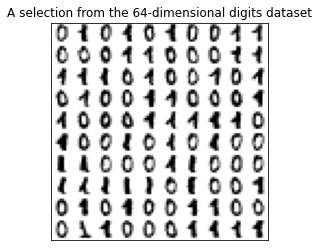

In [3]:
# Plot some digits
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()

In [4]:
model = ps.SSPOC(threshold=2)
model.fit(X, y)

/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/venv/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:390: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


SSPOC(basis=Identity(n_basis_modes=360),
      classifier=LinearDiscriminantAnalysis(), threshold=2)

In [5]:
print('Portion of sensors used:', len(model.selected_sensors) / 64)
print('Selected sensors:', model.selected_sensors)

Portion of sensors used: 0.09375
Selected sensors: [ 6 14 16 24 28 57]


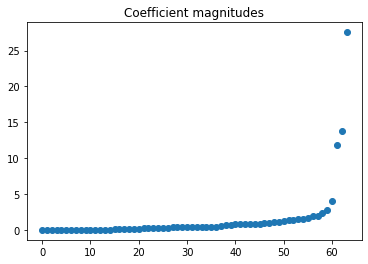

In [6]:
plt.plot(np.sort(np.abs(model.sensor_coef_)), 'o')
plt.title('Coefficient magnitudes');

In [7]:
y_pred = model.predict(X[:, model.selected_sensors])
print('Incorrect classifications:', sum(np.abs(y - y_pred)), 'out of', len(y))
print('Accuracy:', metrics.accuracy_score(y, y_pred))

Incorrect classifications: 12 out of 360
Accuracy: 0.9666666666666667


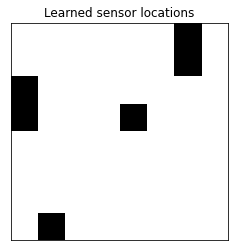

In [8]:
# Plot sensor locations
img = np.zeros(64)
img[model.selected_sensors] = 16

plt.imshow(img.reshape(8, 8), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Learned sensor locations')
plt.show()

## Multiclass classification (LDA)

In [2]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

n_samples, n_features = X.shape
print(n_samples, n_features)

1797 64


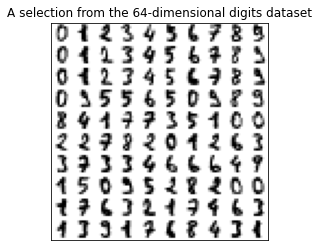

In [3]:
# Plot some digits
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()

In [4]:
threshold = 0.1
l1_penalty = 0.01
model = ps.SSPOC(threshold=threshold, l1_penalty=l1_penalty)
model.fit(X, y)

print('Portion of sensors used:', len(model.selected_sensors) / 64)
print('Selected sensors:', model.selected_sensors)

Portion of sensors used: 0.3125
Selected sensors: [ 8 15 16 23 24 30 31 33 38 40 42 43 46 47 48 52 55 56 57 63]


In [5]:
# Check accuracy on training set
y_pred = model.predict(X[:, model.selected_sensors])
print('Accuracy:', metrics.accuracy_score(y, y_pred))

Accuracy: 0.7006121313299944


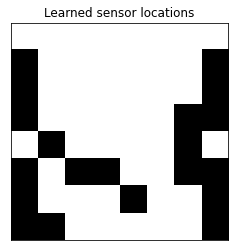

In [6]:
# Plot sensor locations
img = np.zeros(64)
img[model.selected_sensors] = 16

plt.imshow(img.reshape(8, 8), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Learned sensor locations')
plt.show()

Classification report for classifier SSPOC(basis=Identity(n_basis_modes=1797),
      classifier=LinearDiscriminantAnalysis(), l1_penalty=0.01, threshold=0.1):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       178
           1       0.45      0.51      0.48       182
           2       0.66      0.46      0.54       177
           3       0.65      0.64      0.65       183
           4       0.86      0.83      0.84       181
           5       0.50      0.55      0.52       182
           6       0.87      0.88      0.88       181
           7       0.86      0.79      0.82       179
           8       0.57      0.71      0.63       174
           9       0.74      0.69      0.72       180

    accuracy                           0.70      1797
   macro avg       0.71      0.70      0.70      1797
weighted avg       0.71      0.70      0.70      1797


Confusion matrix:
[[167   0   0   0   4   0   1   0   6   0]
 [  0  93  18   3   

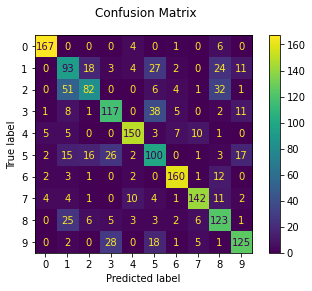

In [7]:
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y, y_pred)))
disp = metrics.plot_confusion_matrix(model.classifier, X[:, model.selected_sensors], y)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

For multiclass problems the "importance coefficients" form a matrix, with each row corresponding to a pixel and each column to a class. Depending on the function that is used to select important sensors (pixels/rows), different results may be obtained. The function is applied row-wise, then a thresholding rule is applied to the resulting vector. Below we give examples of some possible options. 

/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


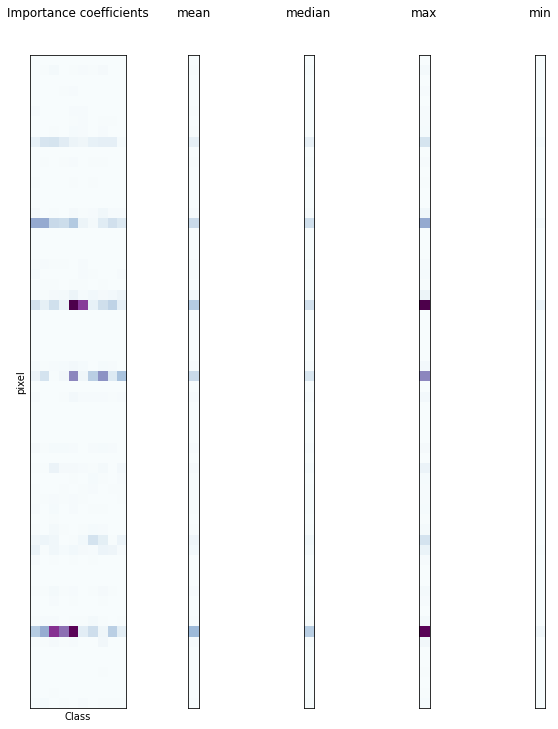

In [38]:
methods = [
    ('mean', np.mean),
    ('median', np.median),
    ('max', np.max),
    ('min', np.min)
]

# Normalize the colormaps
coef_magnitudes = np.abs(model.sensor_coef_)
vmin = np.min(coef_magnitudes)
vmax = np.max(coef_magnitudes)

plot_kws = dict(vmin=vmin, vmax=vmax, cmap="BuPu")

fig, axs = plt.subplots(1, len(methods) + 1, sharey=True, figsize=(10, 12))

axs[0].matshow(np.abs(coef_magnitudes), aspect="auto", **plot_kws)
axs[0].set(xlabel="Class", ylabel="pixel", title="Importance coefficients", xticks=[], yticks=[])

for k, (name, method) in enumerate(methods, 1):
    axs[k].matshow(method(np.abs(coef_magnitudes), axis=1).reshape(-1, 1), **plot_kws)
    axs[k].set(title=name, xticks=[], yticks=[])

fig.show()

Let's see how the accuracy and number of sensors varies as we change the threshold. We'll consider two different methods of thresholding: the mean and max methods.

/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/pysensors/sspoc.py:174: UserWarning: Threshold set too high (1.3738237958832638); no sensors selected.
  f"Threshold set too high ({threshold}); no sensors selected."
/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/pysensors/sspoc.py:177: UserWarning: No selected sensors; model was not refit.
  warnings.warn("No selected sensors; model was not refit.")
/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/pysensors/sspoc.py:174: UserWarning: Threshold set too high (1.813930693911063); no sensors selected.
  f"Threshold set too high ({threshold}); no sensors selected."
/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/pysensors/sspoc.py:177: UserWarning: No selected sensors; model was not refit.
  warnings.warn("No selected sensors; model was not refit.")
/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/pysensors/ss

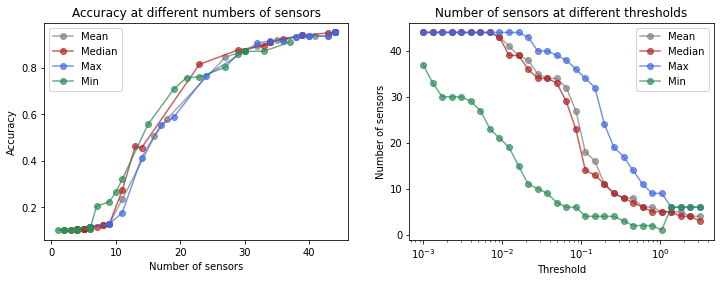

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_kws = dict(alpha=0.7, marker="o", linestyle=None)

methods = (np.mean, np.median, np.max, np.min)
names = ('Mean', 'Median', 'Max', 'Min')
colors = ('gray', 'firebrick', 'royalblue', 'seagreen')

n_sensors = {name: [] for name in names}
accuracy = {name: [] for name in names}
thresholds = np.logspace(-3, 0.5, 30)

for thresh in thresholds:
    for method, name in zip(methods, names):
        model.update_threshold(thresh, xy=(X, y), method=method)
        y_pred = model.predict(X[:, model.selected_sensors])
        accuracy[name].append(metrics.accuracy_score(y, y_pred))
        n_sensors[name].append(len(model.selected_sensors))
        

for name, color in zip(names, colors):
    axs[0].plot(n_sensors[name], accuracy[name], color=color, label=name, **plot_kws)
    axs[1].plot(thresholds, n_sensors[name], color=color, label=name, **plot_kws)
    

axs[0].set(xlabel='Number of sensors', ylabel='Accuracy', title='Accuracy at different numbers of sensors')
axs[1].set(xlabel='Threshold', xscale='log', ylabel='Number of sensors', title='Number of sensors at different thresholds')
axs[0].legend()
axs[1].legend()

fig.show()

## Other classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
classifiers = [
    ('Ridge', RidgeClassifier(alpha=0.01)),
    ('Perceptron', Perceptron(penalty='elasticnet', alpha=0.1)),
    ('Logistic regression', LogisticRegression(C=10, max_iter=500, tol=1e-3)),
    ('SGD', SGDClassifier(max_iter=5000)),
]

for classifier in classifiers:
    print('----------------------------------------------------')
    print(classifier[0])
    print('----------------------------------------------------')
    
    model = ps.SSPOC(classifier=classifier[1], threshold=threshold, l1_penalty=l1_penalty)
    model.fit(X, y)

    print('Portion of sensors used:', len(model.selected_sensors) / 64)
    print('Selected sensors:', model.selected_sensors)

    # Check accuracy on training set
    y_pred = model.predict(X[:, model.selected_sensors])
    print('Accuracy:', metrics.accuracy_score(y, y_pred), '\n\n')

## Other bases

In [ ]:
n_basis_modes = 32
bases = [
    ('Identity', ps.basis.Identity(n_basis_modes=n_basis_modes)),
    ('POD', ps.basis.POD(n_basis_modes=n_basis_modes)),
    ('Random projection', ps.basis.RandomProjection(n_basis_modes=n_basis_modes)),    
]

for basis in bases:
    print('----------------------------------------------------')
    print(basis[0])
    print('----------------------------------------------------')
    
    model = ps.SSPOC(basis=basis[1], threshold=threshold, l1_penalty=l1_penalty)
    model.fit(X, y)

    print('Portion of sensors used:', len(model.selected_sensors) / 64)
    print('Selected sensors:', model.selected_sensors)

    # Check accuracy on training set
    y_pred = model.predict(X[:, model.selected_sensors])
    print('Accuracy:', metrics.accuracy_score(y, y_pred), '\n\n')

In [ ]:
bs = [
    ('identity', ps.basis.Identity(n_basis_modes=32).fit(X)),
    ('pod', ps.basis.POD(n_basis_modes=32).fit(X)),
    ('rp', ps.basis.RandomProjection(n_basis_modes=32).fit(X))
]

In [ ]:
for b in bs:
    print(b[0])
    print(b[1].matrix_representation().shape)
    print(b[1].matrix_inverse().shape)